# Happy Customers
This program takes in a csv file of survey data from a client and uses it to train a machine learning model to predict customer happiness.
The CSV file contains 7 features. The Y value will be a binary happiness value while the other features are integers from 1-5.  These attributes are as follows:

X1 - The order was delivered on time

X2 - The contents of the order was as expected

X3 - Ordered everything they wanted to

X4 - Paid a good price for the order

X5 - Satisfied with the order

X6 - The app made ordering easy

Further analysis will be done to learn which attributes most significantly affect customer happiness

In [41]:
## Import Modules
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import csv
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report, f1_score                                                                                                                                                                                                                                                                                           

In [2]:
# Read in data
path = 'data.csv'
data = pd.read_csv(path)
data.columns = ['happinessStatus', 'onTime', 'expectedContents', 
                'allOrdered', 'goodPrice', 'orderSatisfication', 'easyOrdering']
data.head()

,happinessStatus,onTime,expectedContents,allOrdered,goodPrice,orderSatisfication,easyOrdering
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


# Visualize the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   happinessStatus     126 non-null    int64
 1   onTime              126 non-null    int64
 2   expectedContents    126 non-null    int64
 3   allOrdered          126 non-null    int64
 4   goodPrice           126 non-null    int64
 5   orderSatisfication  126 non-null    int64
 6   easyOrdering        126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [4]:
data.describe()

,happinessStatus,onTime,expectedContents,allOrdered,goodPrice,orderSatisfication,easyOrdering
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
# Check happines status stats
data['happinessStatus'].value_counts()

1    69
0    57
Name: happinessStatus, dtype: int64

In [6]:
data.groupby('happinessStatus').mean()

,onTime,expectedContents,allOrdered,goodPrice,orderSatisfication,easyOrdering
happinessStatus,,,,,,
0,4.087719,2.561404,3.140351,3.684211,3.368421,4.105263
1,4.536232,2.507246,3.449275,3.797101,3.884058,4.376812


In [7]:
def analyzeAttribute(data, colName) :
    # Display Average
    print("Average " + colName + " value: ", data[colName].mean())
    
    # Plot histogram
    bins = np.arange(1,7) - 0.5
    plt.hist(data[colName], bins)
    plt.title(colName)
    plt.show()
    

Average onTime value:  4.333333333333333


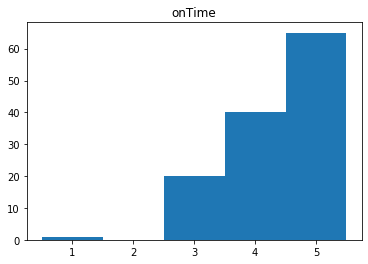

Average expectedContents value:  2.5317460317460316


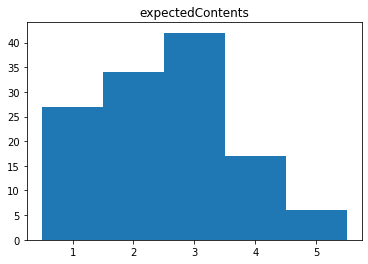

Average allOrdered value:  3.3095238095238093


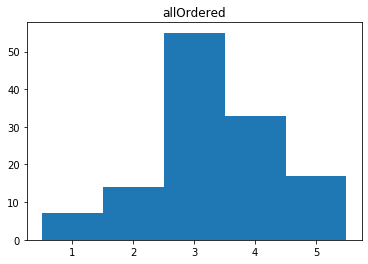

Average goodPrice value:  3.746031746031746


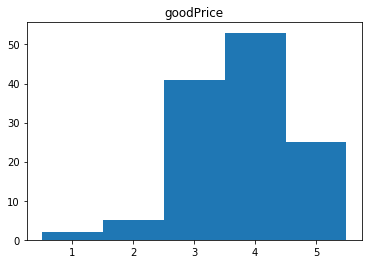

Average orderSatisfication value:  3.6507936507936507


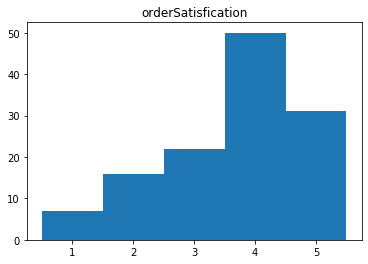

Average easyOrdering value:  4.253968253968254


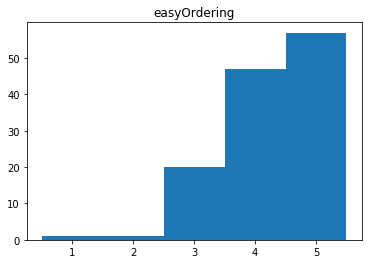

In [8]:
for i in range(1,7) :
    analyzeAttribute(data, data.columns[i])

# Preprocess Data
Divide into 80% training, 20% testing


In [9]:
# Divide Data into X and Y
X = data.drop(columns='happinessStatus')
Y = data['happinessStatus']

# Split data into training and testing
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 0)

print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(100, 6)
(100,)
(26, 6)
(26,)


# Train Models
Create various models here and train them using the training data.  Test them on the separate test data and evaluate them with visual aids.

# 1. Logistic regression
sklearn

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

model = LogisticRegression(max_iter=100000)
model = model.fit(xTrain, yTrain)
yPredict = model.predict(xTest)

In [29]:
def resultsReport(actual, predictions) :
    
    # Visualize classification report with precision, recall and F1 score
    print(classification_report(actual, predictions))

    # Create Confusion matrix vector
    confMatrix = confusion_matrix(actual, predictions)
    dfConfMatrix = pd.DataFrame(confMatrix, index = [i for i in "01"], 
                                columns = [i for i in "01"])

    # Plot Confusion matrix
    sn.heatmap(dfConfMatrix, annot = True)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

              precision    recall  f1-score   support

           0       0.71      0.38      0.50        13
           1       0.58      0.85      0.69        13

    accuracy                           0.62        26
   macro avg       0.65      0.62      0.59        26
weighted avg       0.65      0.62      0.59        26



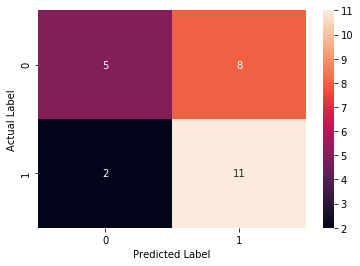

In [30]:
resultsReport(yTest, yPredict)

# 2. Support Vector Machine (SVM)
Outputs a hyperplane that best separates the data points, thereby classifying inputs as one class or another

In [34]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

model = Pipeline([('scale', StandardScaler()),# Scale inputs to 0 mean and 1 variance
                  ('SVM', svm.SVC())])
model = model.fit(xTrain, yTrain)

yPredict = model.predict(xTest)

              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.50      0.62      0.55        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.49        26
weighted avg       0.50      0.50      0.49        26



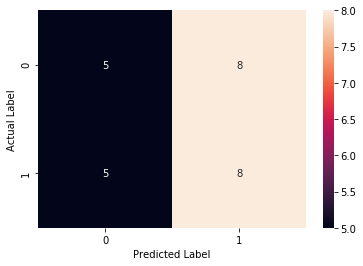

In [35]:
resultsReport(yTest, yPredict)

# 3. Gaussian Naive Bays
Model applies Bayes' theorem as a probabilistic classifier

In [36]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model = model.fit(xTrain, yTrain)

yPredict = model.predict(xTest)

              precision    recall  f1-score   support

           0       0.67      0.46      0.55        13
           1       0.59      0.77      0.67        13

    accuracy                           0.62        26
   macro avg       0.63      0.62      0.61        26
weighted avg       0.63      0.62      0.61        26



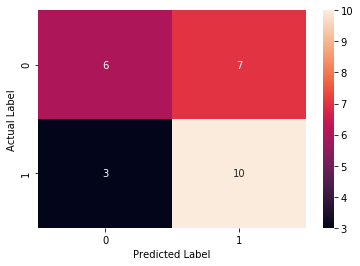

In [37]:
resultsReport(yTest, yPredict)

# 4. Stochastic Gradient Descent


In [38]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier()
model = model.fit(xTrain, yTrain)

yPredict = model.predict(xTest)

/Users/andrewmullen/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.50      1.00      0.67        13

    accuracy                           0.50        26
   macro avg       0.25      0.50      0.33        26
weighted avg       0.25      0.50      0.33        26



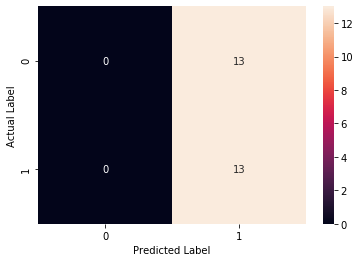

In [40]:
resultsReport(yTest, yPredict)

# 4. K Nearest Neighbours

In [61]:
from sklearn.neighbors import KNeighborsClassifier

kRange = range(1,75)
results = []

# Test out a range of different k values
for k in kRange :
    model = KNeighborsClassifier(n_neighbors = k)
    model = model.fit(xTrain, yTrain)
    
    yPredict = model.predict(xTest)
    
    results.append(f1_score(yTest, yPredict))
    
print(results.index(max(results))+1, max(results)) # +1 because index starts at 0 and our results start with a kvalue of 1


10 0.7407407407407408


Text(0, 0.5, 'F1 Score')

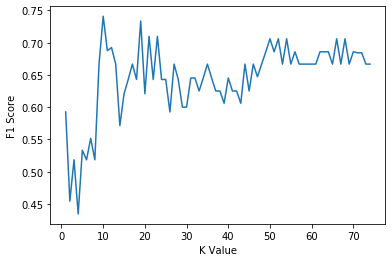

In [58]:
plt.plot(range(1,len(results)+1), results)
plt.xlabel("K Value")
plt.ylabel("F1 Score")

In [62]:
# Recreate k nearest neighbours model with max f1 score aka where k = 10
model = KNeighborsClassifier(n_neighbors=10)
model = model.fit(xTrain, yTrain)

yPredict = model.predict(xTest)

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.71      0.77      0.74        13

    accuracy                           0.73        26
   macro avg       0.73      0.73      0.73        26
weighted avg       0.73      0.73      0.73        26



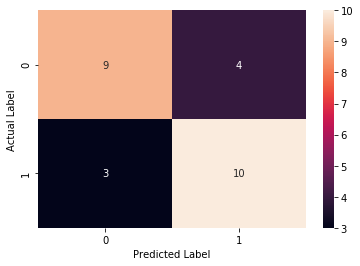

In [64]:
resultsReport(yTest, yPredict)

# 5. Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(xTrain, yTrain)

yPredict = model.predict(xTest)

              precision    recall  f1-score   support

           0       0.46      0.46      0.46        13
           1       0.46      0.46      0.46        13

    accuracy                           0.46        26
   macro avg       0.46      0.46      0.46        26
weighted avg       0.46      0.46      0.46        26



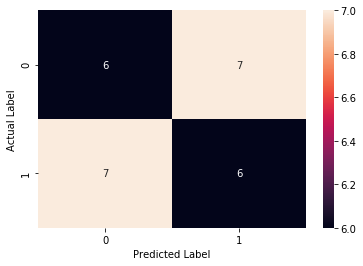

In [73]:
resultsReport(yTest, yPredict)

# 6. Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model = model.fit(xTrain, yTrain)

yPredict = model.predict(xTest)

              precision    recall  f1-score   support

           0       0.56      0.38      0.45        13
           1       0.53      0.69      0.60        13

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.53        26
weighted avg       0.54      0.54      0.53        26



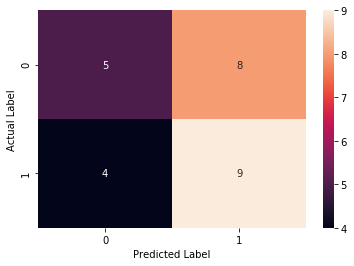

In [76]:
resultsReport(yTest, yPredict)